In [1]:
#@title
# import required libraries

import pandas as pd # dataframes
import numpy as np #mathematical operations

# to visualise

import plotly.express as px # plotly
from wordcloud import WordCloud # wordclouds
import matplotlib.pyplot as plt #matplot
import seaborn as sns #seaborn
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

# Vectorisation

from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

# Treating class imbalanced data

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

# model building

from sklearn.model_selection import train_test_split

# algorithms

from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

# checking up with models

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
# confusion matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix

<h3 style= "color:blue;"> Importing Data Set </h3>

In [2]:
# landing google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
# load your dataframe
original = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Research/Method 1 - Articles /Preprocessed.csv",index_col=[0])

In [45]:
# load augmented dataset
aug= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Research/Augmentation/childprotection_aug.csv")

In [46]:
# intorduce new column to stat ethe fileclass
new = 'fileclass'
value = '1'
aug[new] = value

In [47]:
#conversion to lowercase
aug['content'] = aug['content'].str.lower()
aug.head()

,content,fileclass
0,['mini review published december doi fpubh fro...,1
1,['full terms conditions of access and use can ...,1
2,['full terms conditions of access and use can ...,1
3,['frontiers in psychology april volume article...,1
4,['the cs classifying online risk to children l...,1


In [48]:
# Replace Child protection value with 1
original.loc[original["fileclass"] == "ChildProtection", "fileclass"] = 1
original.head(5)

,fileclass,content
0,1,trend child sexual abuse material trend child ...
1,1,covid remote eliminate female genital mutilati...
2,1,journal medium subsequent selfharm followup ch...
3,1,original ar sexual exploitation abuse child ph...
4,1,covid implication protect child april covid pr...


In [49]:
# Replace other values with 0
original.loc[original["fileclass"] != 1, "fileclass"] = 0

# reorder the dataframe to get childprotection content to appear first
original = original.sort_values(by='fileclass', ascending=False)

original.head(5)

,fileclass,content
0,1,trend child sexual abuse material trend child ...
14,1,medium society author reprint permission oppor...
1,1,covid remote eliminate female genital mutilati...
24,1,hidden shadow coronavirus education develop le...
23,1,full term condition practice issn print journa...


In [50]:
# remove duplicates, leaving the first record
original = original.drop_duplicates(subset=['content'],keep="first")

In [51]:
original.head()

,fileclass,content
0,1,trend child sexual abuse material trend child ...
14,1,medium society author reprint permission oppor...
1,1,covid remote eliminate female genital mutilati...
24,1,hidden shadow coronavirus education develop le...
23,1,full term condition practice issn print journa...


In [52]:
aug = aug.drop_duplicates(subset=['content'],keep="first")

In [53]:
child = original[original['fileclass'] == 1]

In [54]:
original = original[original['fileclass'] != 1]

In [57]:
# Sample size (number of random records you want to extract)
sample_size = 100  # You can adjust this number according to your needs

# Randomly sample records from the original DataFrame
test_0 = original.sample(n=sample_size, random_state=42)  # random_state for reproducibility

# Remove the randomly sampled records from the original DataFrame
original = original.drop(test_0.index)

In [58]:
df = pd.concat([original, aug])

In [59]:
test = pd.concat([test_0,child])

In [60]:
df.shape

(515, 2)

In [61]:
# spread of text files after removing duplicates
# Count the number of items per group
group_counts = df.groupby("fileclass").count()
group_counts=group_counts.reset_index()

# Create the bar chart
fig = px.bar(group_counts, x='fileclass', y='content',color="fileclass")

# Show the chart
fig.show()

<h3> Word Cloud </h3>

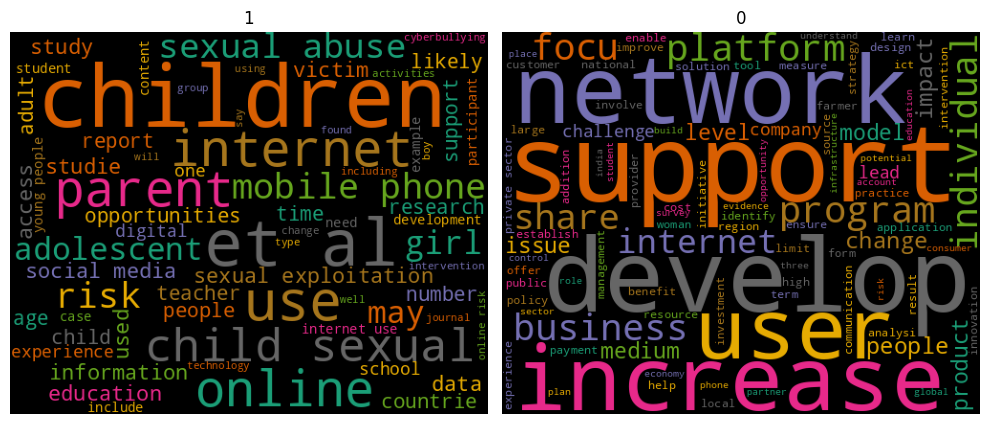

In [ ]:
# word clouds based on intervention areas

# Get all the unique classes in the dataset
classes = df['fileclass'].unique()

# Create a figure with 4 subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 10))
axs = axs.ravel()

# Iterate through each class
for i, class_name in enumerate(classes):
    # Get all the text for the current class
    class_text = df[df['fileclass'] == class_name]['content'].str.cat(sep=' ')
    # Generate the wordcloud
    wordcloud = WordCloud(width = 500, height = 400,
                colormap="Dark2",
                min_font_size = 10).generate(class_text)
    # Plot the wordcloud
    axs[i].imshow(wordcloud)
    axs[i].set_title(f"{class_name}")
    axs[i].axis("off")
fig.tight_layout()
plt.show()

As you can see the data set is class imbalanced.




<b> Now we have to vectorise our content column </b>

In [76]:
# vectorsing the content column
vectorizer = TfidfVectorizer(max_features=2000)
vectorized_df = vectorizer.fit_transform(df['content'])
# defining the y label
y = df['fileclass']
y=y.astype('int')
y=y.to_frame()

<h3 style= "color:blue;"> Defining train and test set </h3>

In [77]:
# train test split
X_train, Y_train = vectorized_df,y

In [79]:
# Replace NaN values in the 'content' column with empty strings
test['content'].fillna('', inplace=True)

# Now you can use the TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=2000)
vectorized_child = vectorizer.fit_transform(test['content'])

# Rest of your code
ychild = test['fileclass']
ychild = ychild.astype('int')


In [80]:
x_test, y_test = vectorized_child, ychild

<h3 style= "color:blue;"> Fit  Models </h3>

<h3> Random Forest</h3>

In [81]:
# fit the model
rf = RandomForestClassifier(class_weight='balanced')
rf.fit(X_train, Y_train.values.ravel())

#make predictions
pred_rf = rf.predict(x_test)

#print accuracy
print("Accuracy %s" % accuracy_score(pred_rf,y_test))

Accuracy 0.7936507936507936


In [82]:
print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88       100
           1       0.00      0.00      0.00        26

    accuracy                           0.79       126
   macro avg       0.40      0.50      0.44       126
weighted avg       0.63      0.79      0.70       126



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



<h3> Decision Trees </h3>

In [83]:
# fit the model
dt = DecisionTreeClassifier(class_weight='balanced')
dt.fit(X_train, Y_train.values.ravel())

# make predictions
pred_dt = dt.predict(x_test)

# print accuracy
print("Accuracy %s" % accuracy_score(pred_dt,y_test))

Accuracy 0.5714285714285714


In [84]:
print(classification_report(y_test,pred_dt))

              precision    recall  f1-score   support

           0       0.79      0.63      0.70       100
           1       0.20      0.35      0.25        26

    accuracy                           0.57       126
   macro avg       0.49      0.49      0.47       126
weighted avg       0.67      0.57      0.61       126



<h3> Naive Bayes </h3>

In [85]:
# fit the model
nb = MultinomialNB()
nb.fit(X_train, Y_train.values.ravel())

# make predictions
pred_nb = nb.predict(x_test)

# print accuracy
print("Accuracy %s" % accuracy_score(pred_nb,y_test))

Accuracy 0.7936507936507936


In [86]:
print(classification_report(y_test,pred_nb))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88       100
           1       0.00      0.00      0.00        26

    accuracy                           0.79       126
   macro avg       0.40      0.50      0.44       126
weighted avg       0.63      0.79      0.70       126



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



<h3> K-Nearest Neighbours </h3>

In [87]:
# fit the model
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train.values.ravel())

# make predictions
pred_knn = knn.predict(x_test)

# print accuracy
print("Accuracy %s" % accuracy_score(pred_knn,y_test))

Accuracy 0.7857142857142857


In [88]:
print(classification_report(y_test,pred_knn))

              precision    recall  f1-score   support

           0       0.79      0.99      0.88       100
           1       0.00      0.00      0.00        26

    accuracy                           0.79       126
   macro avg       0.40      0.49      0.44       126
weighted avg       0.63      0.79      0.70       126



<h3> Logistic Regression </h3>

In [89]:
# fit the model
lr = LogisticRegression(class_weight='balanced')
lr.fit(X_train, Y_train.values.ravel())

# make predictions
pred_lr = lr.predict(x_test)

# print accuracy
print("Accuracy %s" % accuracy_score(pred_lr,y_test))

Accuracy 0.7936507936507936


In [90]:
print(classification_report(y_test,pred_lr))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88       100
           1       0.00      0.00      0.00        26

    accuracy                           0.79       126
   macro avg       0.40      0.50      0.44       126
weighted avg       0.63      0.79      0.70       126



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



<h3> Ada Boost </h3>

In [91]:
# fit the model
ab = AdaBoostClassifier()
ab.fit(X_train, Y_train.values.ravel())

# make predictions
pred_ab = ab.predict(x_test)

# print accuracy
print("Accuracy %s" % accuracy_score(pred_ab,y_test))

Accuracy 0.6507936507936508


In [92]:
print(classification_report(y_test,pred_ab))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78       100
           1       0.15      0.15      0.15        26

    accuracy                           0.65       126
   macro avg       0.47      0.47      0.47       126
weighted avg       0.65      0.65      0.65       126



<h3> SGD </h3>

In [93]:
# fit the model
sgd = SGDClassifier(class_weight='balanced')
sgd.fit(X_train, Y_train.values.ravel())

# make predictions
pred_sgd = sgd.predict(x_test)

# print accuracy
print("Accuracy %s" % accuracy_score(pred_sgd,y_test))

Accuracy 0.7380952380952381


In [94]:
print(classification_report(y_test,pred_sgd))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       100
           1       0.27      0.15      0.20        26

    accuracy                           0.74       126
   macro avg       0.53      0.52      0.52       126
weighted avg       0.69      0.74      0.71       126



<h3> Support Vectore Machine </h3>

In [95]:
# fit the model
svc = SVC(class_weight='balanced')
svc.fit(X_train, Y_train.values.ravel())

# make predictions
pred_svc = svc.predict(x_test)

# print accuracy
print("Accuracy %s" % accuracy_score(pred_svc,y_test))

Accuracy 0.7936507936507936


In [96]:
print(classification_report(y_test,pred_svc))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88       100
           1       0.00      0.00      0.00        26

    accuracy                           0.79       126
   macro avg       0.40      0.50      0.44       126
weighted avg       0.63      0.79      0.70       126



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



<h3> Ensemble </h3>

In [97]:
from sklearn.ensemble import VotingClassifier

# Create instances of the SGDClassifier and RandomForestClassifier
sgd = SGDClassifier()
knn = KNeighborsClassifier()

# Create an instance of the VotingClassifier
ensemble = VotingClassifier(estimators=[('sgd', sgd), ('knn', knn)], voting='hard')

# Fit the VotingClassifier to the data
ensemble.fit(X_train, Y_train.values.ravel())

# Make predictions
pred_ensemble = ensemble.predict(x_test)

# Print accuracy
print("Accuracy %s" % accuracy_score(pred_ensemble, y_test))

Accuracy 0.7936507936507936


In [98]:
print(classification_report(y_test,pred_ensemble))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88       100
           1       0.00      0.00      0.00        26

    accuracy                           0.79       126
   macro avg       0.40      0.50      0.44       126
weighted avg       0.63      0.79      0.70       126



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



<h3 style= "color:blue;"> Conclusion - SGD</h3>

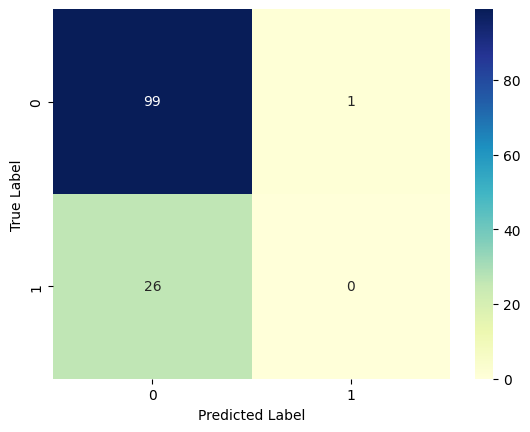

In [99]:
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, pred_sgd)

import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(conf_matrix, annot = True, fmt = "d", cmap = "YlGnBu")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()